# Fuga de aire
#### Importamos las Librerias

In [60]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

#from feature_selector import FeatureSelector 
#import vlc
# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns

import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)

Ruta actual de trabajo C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\Operaciones


### Importamos el dataset

In [61]:
df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\taller_operaciones.csv',sep=';')
# se eliminan las columnas que sabemos que  no aportan información veraz

df = df.drop('ndias', 1)
df = df.drop('ndias_ant_area', 1)
df = df.drop('ndias_ant_tipo', 1)
df

C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/2544353181.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('ndias', 1)


,nomopera,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
0,Flexible escape,B117,6,1866.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
1,Cambio filtro retarde,U198,24,8471.0,73.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
2,Fuga refrigerante,U198,24,8471.0,73.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
3,Fuga refrigerante,B117,6,3.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
4,Alternador,X110,2,703.0,16.0,FORD,TRANSIT,92.0,Discrecional,Microbus
...,...,...,...,...,...,...,...,...,...,...
49403,Fuga de aire,B158,14,44.0,53.0,MAN,LION'S COACH,324.0,Discrecional,Normal
49404,Fallo en AVS,J266,17,1.0,55.0,SCANIA,ATLANTIS,280.0,Discrecional,Normal
49405,Fuga refrigerante,E652,4,4.0,5.0,FORD,MONDEO BA7,NaN,TURISMO,NaN
49406,Plataforma elevadora,T252,14,7.0,27.0,IVECO,DIVO II INTERCITY,259.0,Discrecional,Normal


filtramos los datos  eliminando negativos inferiores a 0 o superiores a 150 ya que no tendria sentido una reparación con esos valores, ya que se ha preguntado por esta información

In [62]:
df_drop=df[df['ndias_ant']>150].index
df=df.drop(df_drop)
df_drop=df[df['ndias_ant']<=0].index
df=df.drop(df_drop)
df=df.reset_index(drop = True)
df

,nomopera,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
0,Fuga refrigerante,B117,6,3.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
1,Frenos 1º eje,T227,4,3.0,38.0,MERCEDES BENZ,TOURING,310.0,Discrecional,Normal
2,Regular ralenti,U205,22,9.0,81.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
3,Cambio filtro retarde,B117,6,5.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
4,Inyectores,U208,24,22.0,71.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
...,...,...,...,...,...,...,...,...,...,...
45947,Fuga de aire,B158,14,44.0,53.0,MAN,LION'S COACH,324.0,Discrecional,Normal
45948,Fallo en AVS,J266,17,1.0,55.0,SCANIA,ATLANTIS,280.0,Discrecional,Normal
45949,Fuga refrigerante,E652,4,4.0,5.0,FORD,MONDEO BA7,NaN,TURISMO,NaN
45950,Plataforma elevadora,T252,14,7.0,27.0,IVECO,DIVO II INTERCITY,259.0,Discrecional,Normal


# Agrupamos
se crea una columna **grupopera** donde se agrupan las operaciones por tipos fallos y reparaciones,  se se obtiene información, hablando con  los especialistas de como se deberia agrupar.

### SISTEMA DE REFRIGERACIÓN

In [63]:
df['grupopera'] = np.where(
                        (df['nomopera'].str.contains('Bomba agua'))|
                        (df['nomopera'].str.contains('Intercooler'))|
                        (df['nomopera'].str.contains('Manguito/s calefaccion'))|
                        (df['nomopera'].str.contains('Manguito/s motor'))|
                        (df['nomopera'].str.contains('Radiador'))|  
                        (df['nomopera'].str.contains('Termostatos'))| 
                        (df['nomopera'].str.contains('Fuga refrigerante'))| 
                        (df['nomopera'].str.contains('Presion en circuito refrigeracion'))
                         ,'Sistema refrigeración',np.nan)

### SISTEMA DE DIRECION

In [64]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Caja direccion'))|
                           (df['nomopera'].str.contains('Fuga aceite servodireccion'))|
                           (df['nomopera'].str.contains('Rotulas direccion'))|
                           (df['nomopera'].str.contains('Alineado de direccion'))|
                           (df['nomopera'].str.contains('Timoneria direccion'))
                           ,'Sistema dirección',df['grupopera'])

### SISTEMA FRENOS

In [65]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Frenos 1º eje'))|
                           (df['nomopera'].str.contains('Frenos 2º eje'))|
                           (df['nomopera'].str.contains('Frenos 3º eje'))|
                           (df['nomopera'].str.contains('Freno mano'))|
                           (df['nomopera'].str.contains('Disco'))|
                           (df['nomopera'].str.contains('Bomba freno'))
                           ,'Sistema frenos',df['grupopera'])

### SISTEMA DE ESCAPE

In [66]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Flexible escape'))|
                           (df['nomopera'].str.contains('Fuga escape'))|
                           (df['nomopera'].str.contains('Catalizador'))|
                           (df['nomopera'].str.contains('Silencioso'))
                           ,'Sistema de escape',df['grupopera'])

### SISTEMA AMORTIGUACIÓN

In [67]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Regular suspension'))|
                           (df['nomopera'].str.contains('Amortiguador 2º eje derecho'))|
                           (df['nomopera'].str.contains('Amortiguadores 2º eje'))|
                           (df['nomopera'].str.contains('Amortiguadores 3º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 1º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 2º eje'))
                           ,'Sistema de amortiguación',df['grupopera'])

### SISTEMA DE ALIMENTACIÓN

In [68]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Inyectores'))|
                           (df['nomopera'].str.contains('Reglaje inyectores'))
                           ,'Sistema de alimentación',df['grupopera'])

### MOTOR

In [69]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Cambiar turbina/motor condensadora'))|
                           (df['nomopera'].str.contains('Culata del compresor del motor'))|
                           (df['nomopera'].str.contains('Fuga aceite motor'))|
                           (df['nomopera'].str.contains('Limpiar motor'))|
                           (df['nomopera'].str.contains('Motor'))|
                           (df['nomopera'].str.contains('Poleas motor'))|
                           (df['nomopera'].str.contains('Reten trasero motor'))|
                           (df['nomopera'].str.contains('Ruido en motor'))|
                           (df['nomopera'].str.contains('Arbol de levas'))|
                           (df['nomopera'].str.contains('Casquillos de biela'))|
                           (df['nomopera'].str.contains('Potencia motor'))|
                           (df['nomopera'].str.contains('Turbo'))|
                           (df['nomopera'].str.contains('Manguito/s admision'))|
                           (df['nomopera'].str.contains('Tacos motor'))
                           ,'Motor',df['grupopera'])

### PRECALENTADOR

In [70]:
df['grupopera'] = np.where((df['nomopera'].str.contains('recalentador'))
                           ,'Precalentador',df['grupopera'])

### ALTERNADOR

In [71]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Alternador'))|
                           #(df['nomopera'].str.contains('Soporte alternador'))|
                           (df['nomopera'].str.contains('Alternador auxiliar'))
                           ,'Alternador',df['grupopera'])

### ABS/EBS

In [72]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo en ABS/EBS'))
                           ,'ABS/EBS',df['grupopera'])

### ADBLUE

In [73]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo adblue'))|
                           (df['nomopera'].str.contains('Fuga adblue'))
                           ,'Adblue',df['grupopera'])

### BATERIAS

In [74]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Baterias'))|
                           (df['nomopera'].str.contains('Carga de baterias'))
                           ,'Baterias',df['grupopera'])

### CORREAS

In [75]:
df['grupopera'] = np.where((df['nomopera'].str.contains('orrea'))
                           ,'Correas',df['grupopera'])

### REGLAJE VÁLVULAS

In [76]:
df['grupopera'] = np.where((df['nomopera'].str.contains('valvula'))
                           ,'Reglaje válvulas',df['grupopera'])

### FILTRO PARTICULAS

In [77]:
df['grupopera'] = np.where((df['nomopera'].str.contains('iltro part'))
                           ,'Filtro de Particulas',df['grupopera'])

### EDC

In [78]:
df['grupopera'] = np.where((df['nomopera'].str.contains('EDC'))
                           ,'Fallo en EDC',df['grupopera'])

### FUGA DE AIRE

In [79]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuga de aire'))
                           ,'Fuga de aire',df['grupopera'])

### TURBINA MOTOR

In [80]:
df['grupopera'] = np.where((df['nomopera'].str.contains('turbina'))
                           ,'Cambiar turbina/motor condensadora',df['grupopera'])

### GASOIL

In [81]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Deposito de gasoil'))|
                           #(df['nomopera'].str.contains('Cambio filtro gasoil'))|
                           (df['nomopera'].str.contains('Fuga gasoil'))
                           ,'Gasoil',df['grupopera'])

### FALLO EN AVS

In [82]:
df['grupopera'] = np.where((df['nomopera'].str.contains('AVS'))
                           ,'Fallo en AVS',df['grupopera'])

### FUELLE

In [83]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuelle 1º eje derecho'))|
                           (df['nomopera'].str.contains('Fuelle 1º eje izquierdo'))|
                           (df['nomopera'].str.contains('Fuelles 2º eje'))|
                           (df['nomopera'].str.contains('Fuelles1º eje'))
                           ,'Fuelle',df['grupopera'])

### PINCHAZO

In [84]:
df['grupopera'] = np.where((df['nomopera'].str.contains('pinchazo'))
                           ,'Pinchazo',df['grupopera'])

Eliminación de operaciones no agrupadas

In [85]:
df=df[~df['grupopera'].str.contains("nan")]
df.groupby(['grupopera']).count()

,nomopera,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
grupopera,,,,,,,,,,
ABS/EBS,262,262,262,262,260,262,262,226,261,247
Adblue,178,178,178,178,177,178,178,177,178,178
Alternador,722,722,722,722,718,722,721,586,715,695
Baterias,823,823,823,823,812,823,821,648,817,768
Cambiar turbina/motor condensadora,517,517,517,517,516,517,517,428,517,515
Correas,2294,2294,2294,2294,2280,2294,2290,1917,2280,2242
Fallo en AVS,245,245,245,245,245,245,245,201,245,241
Fallo en EDC,903,903,903,903,892,903,903,781,901,843
Filtro de Particulas,156,156,156,156,153,156,156,121,155,132


vemos las observaciones que tenemos por cada grupo

<BarContainer object of 22 artists>

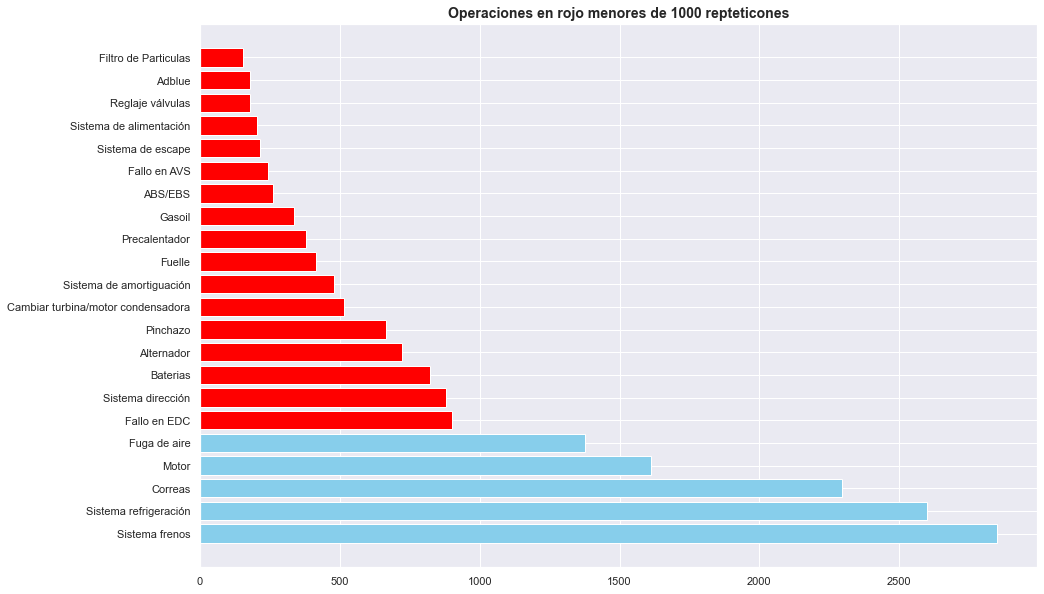

In [86]:
plt.figure(figsize=(15,10))
limite=1000

x=df['grupopera'].value_counts().index
y=df['grupopera'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Operaciones en rojo menores de %d repteticones" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

se observa que no estan balanceados por lo que se decide predecir si ocurre un evento concreto o no, se va a empezar por sistema de refigeración

Seleccionamos los atributos que queremos utilizar

In [87]:
df= df[['grupopera','marca','modelo','v_codigbus','tipo','v_edad','capacidad','ndias_ant','subtipo','potencia']]
df

,grupopera,marca,modelo,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia
0,Sistema refrigeración,MAN,TOURING INTERCITY,B117,Interurbano,6,74.0,3.0,Normal,228.0
1,Sistema frenos,MERCEDES BENZ,TOURING,T227,Discrecional,4,38.0,3.0,Normal,310.0
4,Sistema de alimentación,MAN,SIN ASIGNAR,U208,BUS TURISTICO,24,71.0,22.0,Turistic Valencia,NaN
6,Baterias,SCANIA,CS40 CITY II,H086,Urbano,1,100.0,18.0,Normal,191.0
8,Correas,MAN,SIN ASIGNAR,U238,BUS TURISTICO,25,81.0,12.0,Turistic Valencia,NaN
...,...,...,...,...,...,...,...,...,...,...
45946,Sistema frenos,MAN,i6 13.37,C099,Discrecional,7,71.0,147.0,Normal,353.0
45947,Fuga de aire,MAN,LION'S COACH,B158,Discrecional,14,53.0,44.0,Normal,324.0
45948,Fallo en AVS,SCANIA,ATLANTIS,J266,Discrecional,17,55.0,1.0,Normal,280.0
45949,Sistema refrigeración,FORD,MONDEO BA7,E652,TURISMO,4,5.0,4.0,NaN,NaN


### TARGET ➡ Correas
seleccionamos el target

In [88]:
target='Fuga de aire'
df['target'] = np.where((df['grupopera'].str.contains(target)),1,0)
df

,grupopera,marca,modelo,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia,target
0,Sistema refrigeración,MAN,TOURING INTERCITY,B117,Interurbano,6,74.0,3.0,Normal,228.0,0
1,Sistema frenos,MERCEDES BENZ,TOURING,T227,Discrecional,4,38.0,3.0,Normal,310.0,0
4,Sistema de alimentación,MAN,SIN ASIGNAR,U208,BUS TURISTICO,24,71.0,22.0,Turistic Valencia,NaN,0
6,Baterias,SCANIA,CS40 CITY II,H086,Urbano,1,100.0,18.0,Normal,191.0,0
8,Correas,MAN,SIN ASIGNAR,U238,BUS TURISTICO,25,81.0,12.0,Turistic Valencia,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
45946,Sistema frenos,MAN,i6 13.37,C099,Discrecional,7,71.0,147.0,Normal,353.0,0
45947,Fuga de aire,MAN,LION'S COACH,B158,Discrecional,14,53.0,44.0,Normal,324.0,1
45948,Fallo en AVS,SCANIA,ATLANTIS,J266,Discrecional,17,55.0,1.0,Normal,280.0,0
45949,Sistema refrigeración,FORD,MONDEO BA7,E652,TURISMO,4,5.0,4.0,NaN,NaN,0


In [89]:
round(df.isna().sum() * 100 / len(df),2)

grupopera      0.00
marca          1.88
modelo         2.13
v_codigbus     0.00
tipo           2.32
v_edad         0.00
capacidad      2.72
ndias_ant      1.88
subtipo        6.23
potencia      19.90
target         0.00
dtype: float64

imputamos los valores de potencia con la mediana de las potencias

In [90]:
#mediana_pot=df['potencia'].median()
#df['potencia'].fillna(value=mediana_pot, inplace=True) 

eliminamos los  missings

In [91]:
df =df.dropna()
df.reset_index(drop = True, inplace = True)

#### codificamos las categorias para poder utilizarlas en los modelos

In [92]:
import category_encoders as ce
df_cat=df.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['marca','tipo','modelo','v_codigbus','subtipo'])
df_enc = encoder.fit_transform(df_cat)
df_enc

,grupopera,marca,modelo,v_codigbus,tipo,v_edad,subtipo
0,Sistema refrigeración,1,1,1,1,6,1
1,Sistema frenos,2,2,2,2,4,1
2,Baterias,3,3,3,3,1,1
3,Sistema frenos,1,4,4,2,1,1
4,Sistema frenos,1,4,4,2,1,1
...,...,...,...,...,...,...,...
14535,Sistema frenos,2,14,23,2,15,1
14536,Sistema frenos,1,41,78,2,7,1
14537,Sistema frenos,1,41,78,2,7,1
14538,Fuga de aire,1,21,85,2,14,1


#### Normalizamos los valores de las columnas númericas

In [93]:
df_num=df.select_dtypes(include=np.number)
cols_num=df_num.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)

concatenamos

In [94]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

(14540, 11)

In [95]:
df_norm = df_norm.drop('grupopera', 1)
df_norm

C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/3742936719.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_norm = df_norm.drop('grupopera', 1)


,marca,modelo,v_codigbus,tipo,v_edad,subtipo,capacidad,ndias_ant,potencia,target
0,1,1,1,1,6,1,0.436709,0.013514,0.557047,0.0
1,2,2,2,2,4,1,0.208861,0.013514,0.832215,0.0
2,3,3,3,3,1,1,0.601266,0.114865,0.432886,0.0
3,1,4,4,2,1,1,0.316456,0.135135,0.926174,0.0
4,1,4,4,2,1,1,0.316456,0.135135,0.926174,0.0
...,...,...,...,...,...,...,...,...,...,...
14535,2,14,23,2,15,1,0.151899,0.006757,0.530201,0.0
14536,1,41,78,2,7,1,0.417722,0.986486,0.976510,0.0
14537,1,41,78,2,7,1,0.417722,0.986486,0.976510,0.0
14538,1,21,85,2,14,1,0.303797,0.290541,0.879195,1.0


#### Tablas de codificacióin
se crean tablas pàra poder mantener la interpretabilidad.

**Tabla 1**   
*codigo del autobus*

In [96]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

,v_codigbus,codigo
0,B117,1
1,T227,2
2,H086,3
3,B129,4
4,H076,5
...,...,...
338,82HC,339
339,F193,340
340,63HC,341
341,THP0313,342


**Tabla 2**   
*Marca*

In [97]:
df_marca = pd.DataFrame({'Marca':pd.unique(df.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

,Marca,codigo
0,MAN,1
1,MERCEDES BENZ,2
2,SCANIA,3
3,FORD,4
4,VOLVO,5
5,IVECO,6
6,RENAULT,7
7,DAF,8
8,CUMMINS,9
9,IVECO/FIAT,10


**Tabla 3**   
*Modelo*

In [98]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

,modelo,codigo
0,TOURING INTERCITY,1
1,TOURING,2
2,CS40 CITY II,3
3,DIVO II,4
4,CENTURY,5
...,...,...
86,TRANSIT TOURNEO,87
87,FUTURA,88
88,DYPARRO,89
89,SUNRISE,90


**Tabla 4**   
*Tipo*

In [99]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

,tipo,codigo
0,Interurbano,1
1,Discrecional,2
2,Urbano,3
3,Turismo,4


**Tabla 5**   
*subtipo*

In [100]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

,subtipo,codigo
0,Normal,1
1,Microbus,2
2,Midibus,3
3,Doble Piso,4
4,VTC,5
5,Articulado,6


### Creamos un dataset balanciado

In [101]:
df_target1=df_norm[df['target']==1]
df_target0=df_norm[df['target']==0]

In [102]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
                                        #df_target0.drop(columns = "target"),
                                        df_target0,
                                        df_target0['target'],
                                        test_size=0.91,
                                        random_state = 123
                                    )

In [103]:
X_train_t

,marca,modelo,v_codigbus,tipo,v_edad,subtipo,capacidad,ndias_ant,potencia,target
4282,1,34,53,3,4,4,0.474684,0.000000,0.459732,0.0
3868,1,24,40,2,6,3,0.189873,0.047297,0.382550,0.0
13963,6,62,197,2,13,1,0.316456,0.054054,0.661074,0.0
12859,2,39,70,2,20,2,0.088608,0.128378,0.110738,0.0
5374,1,11,71,2,12,1,0.341772,0.013514,0.916107,0.0
...,...,...,...,...,...,...,...,...,...,...
5641,3,5,7,2,10,1,0.316456,0.000000,0.731544,0.0
13293,1,41,78,2,6,1,0.417722,0.290541,0.976510,0.0
1411,1,9,18,2,8,1,0.310127,0.013514,0.926174,0.0
12632,2,23,38,2,13,2,0.088608,0.040541,0.244966,0.0


In [104]:
df_norm = pd.concat([df_target1,X_train_t])
df_norm.reset_index(drop = True, inplace = True)

0.0    1205
1.0    1145
Name: target, dtype: int64


Text(0.5, 0, 'Cantidad de observaciones')

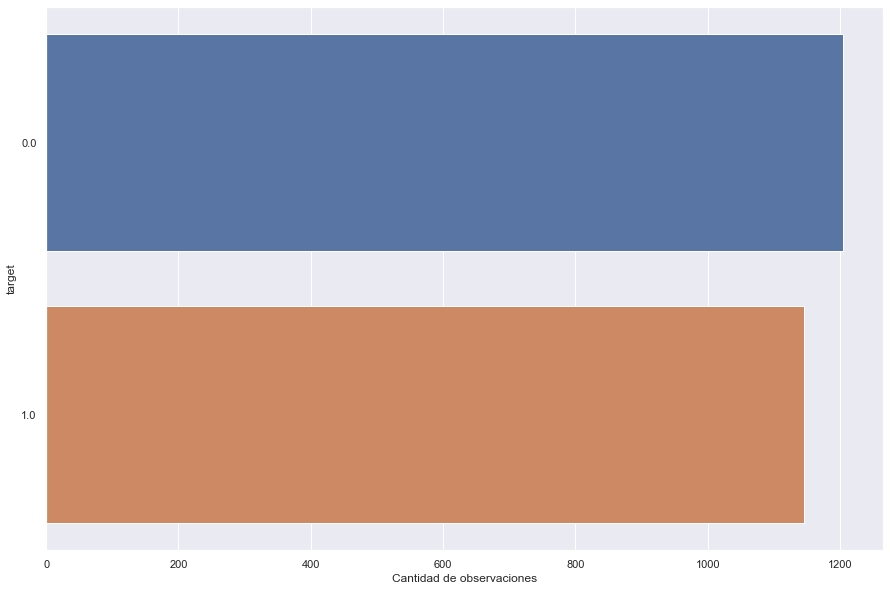

In [105]:
print(df_norm['target']. value_counts ())

plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(y="target",data=df_norm)

plt.xlabel('Cantidad de observaciones') 

In [106]:
df.describe()

,capacidad,ndias_ant,potencia,target
count,14540.000000,14540.000000,14540.000000,14540.000000
mean,50.947455,17.459904,258.944979,0.078748
std,19.003335,20.462584,71.162770,0.269355
min,5.000000,1.000000,62.000000,0.000000
25%,40.000000,5.000000,220.000000,0.000000
50%,54.000000,10.000000,279.000000,0.000000
75%,59.000000,22.000000,317.000000,0.000000
max,163.000000,149.000000,360.000000,1.000000


## Analisis de correlaciones

<AxesSubplot:>

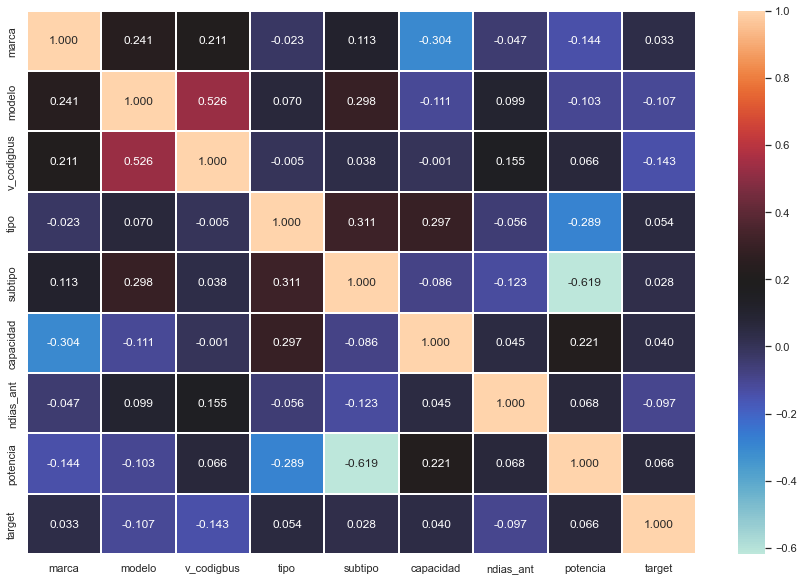

In [107]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.3f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

## Analisis de componentes principales

In [108]:
df_feat = np.transpose(df_norm)
df_feat=df_feat.drop('target', 0)

C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/3143545238.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_feat=df_feat.drop('target', 0)


In [109]:
names =  df_feat.index
names

Index(['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo',
       'capacidad', 'ndias_ant', 'potencia'],
      dtype='object')

### PCA para el analisis de componentes

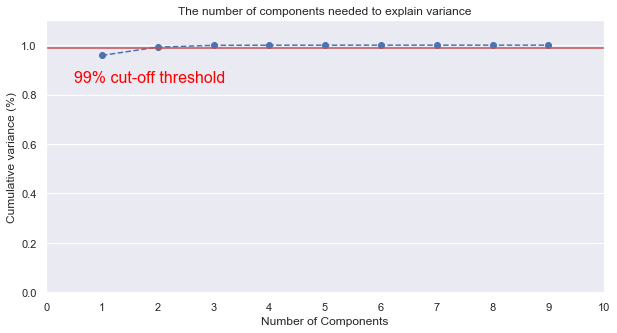

In [110]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.85514346 0.11130345]


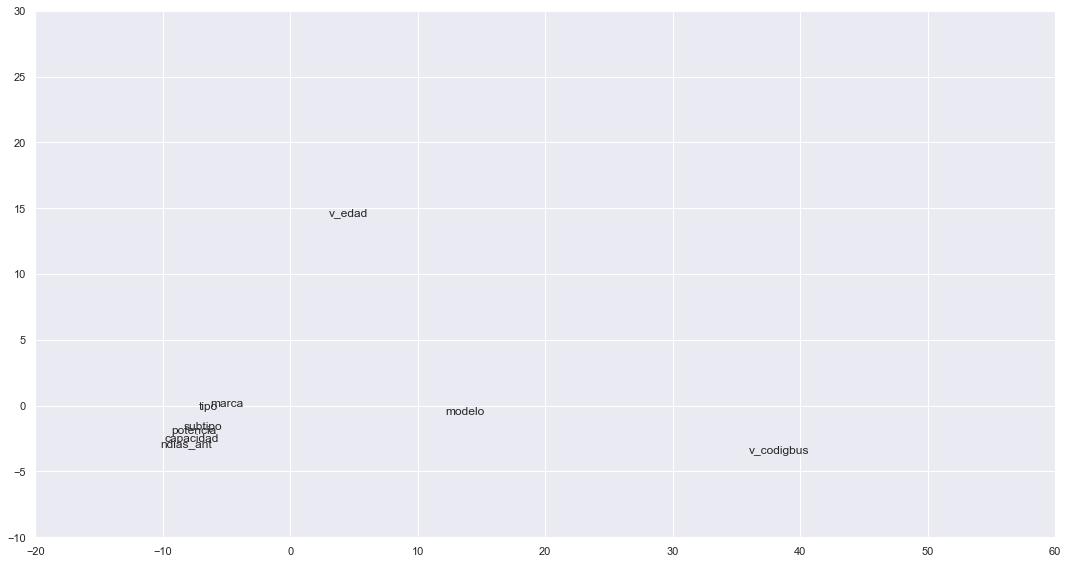

In [111]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-20, 60)
plt.ylim(-10, 30)
ax.grid(True)
fig.tight_layout()
plt.show()

## Clustering jerarquico

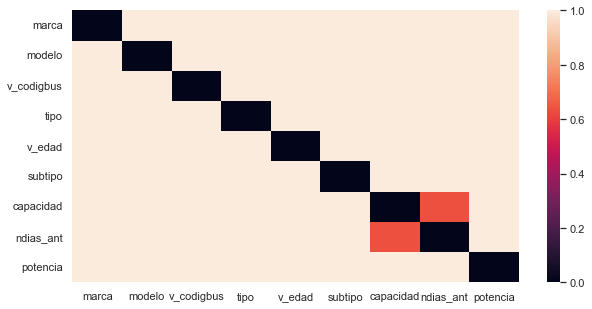

In [112]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

# Construcción del Dendrograma

C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/2460466420.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


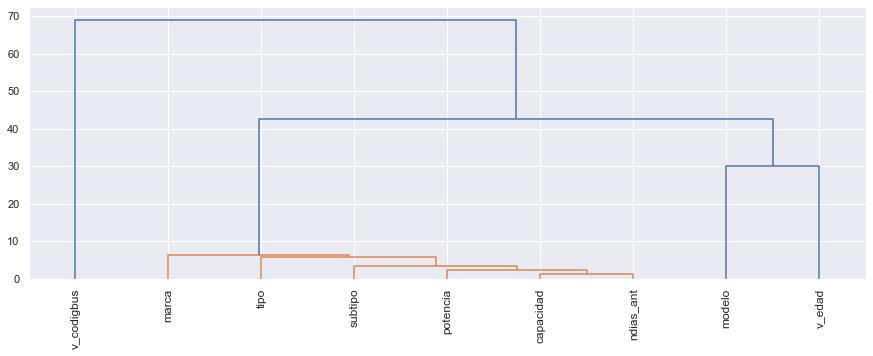

In [113]:


clusters = cluster.hierarchy.linkage(matdist, method = 'single')

plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 8, labels = names , leaf_rotation=90)
plt.show()

se puede ver que las caracteristicas *subtipo*, *potencia*, *capacidad* y *ndias_ant* tiene una distribución de la varianza similar, al igual que *marca* y *tipo*

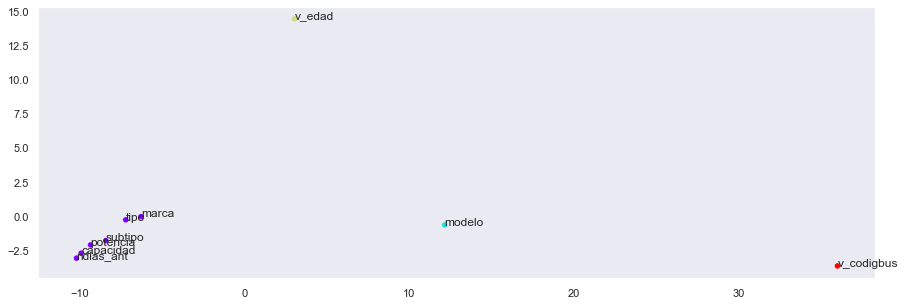

In [114]:
cut = 8 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.grid()
plt.show()

In [115]:
df_norm

,marca,modelo,v_codigbus,tipo,v_edad,subtipo,capacidad,ndias_ant,potencia,target
0,1,11,14,2,3,1,0.310127,0.222973,0.926174,1.0
1,2,2,2,2,5,1,0.208861,0.128378,0.832215,1.0
2,1,17,30,2,1,1,0.354430,0.027027,0.879195,1.0
3,2,2,2,2,6,1,0.208861,0.337838,0.832215,1.0
4,3,13,25,2,1,1,0.316456,0.074324,0.728188,1.0
...,...,...,...,...,...,...,...,...,...,...
2345,3,5,7,2,10,1,0.316456,0.000000,0.731544,0.0
2346,1,41,78,2,6,1,0.417722,0.290541,0.976510,0.0
2347,1,9,18,2,8,1,0.310127,0.013514,0.926174,0.0
2348,2,23,38,2,13,2,0.088608,0.040541,0.244966,0.0


#### PCA para analizar si conviene reducir las variables

C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/149455341.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))


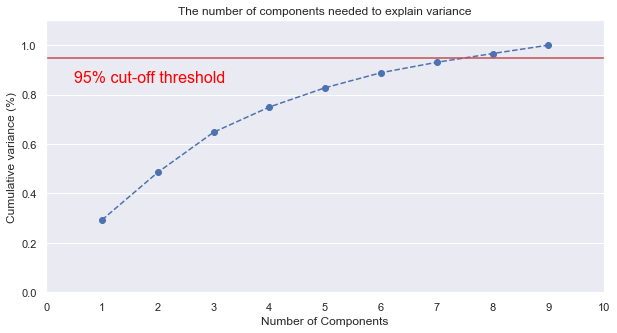

In [116]:
from sklearn.decomposition import PCA
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))
pca = PCA().fit(features_norm)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [117]:
names=df_norm['target']
names2=df_norm['subtipo']

C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/2251045822.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))


Variance Ratio:  [0.29250563 0.19255405 0.16233364 0.10222536 0.0780696  0.06076973
 0.04218169 0.03534683]


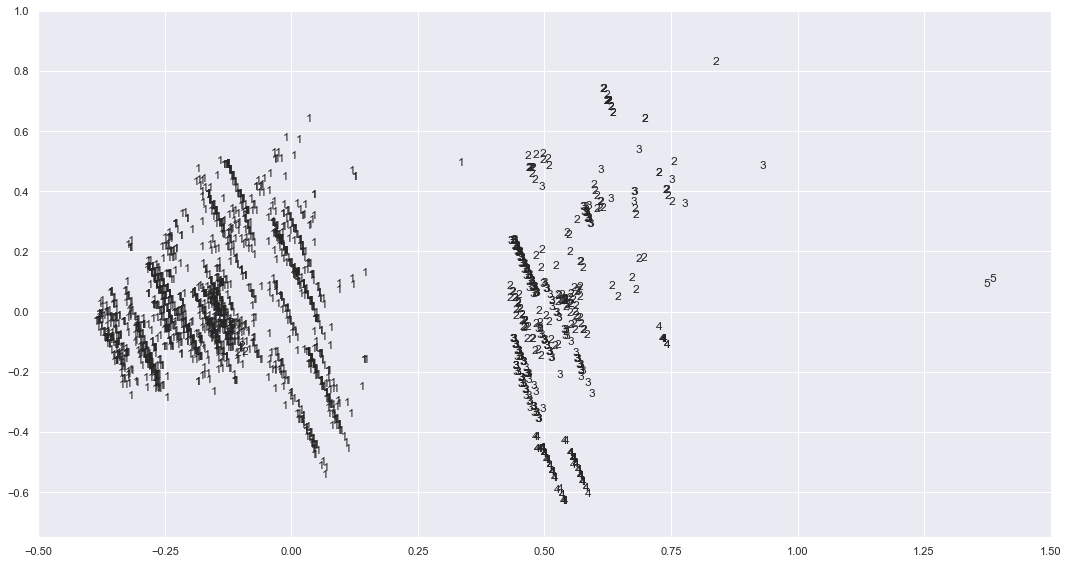

In [118]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 8)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][2], names2[i]) 


plt.xlim(-0.5, 1.5)
plt.ylim(-0.75, 1)
ax.grid(True)
fig.tight_layout()
plt.show()

podemos ver que los autobuses del subtipo 1 *'Normal'* forman un cluster y el resto otro.

Tambien podemos ver que no vale la pena  reducir la dimensionalidad ya que  perdemos la interpretabilidad y la varianza explicada delso primeros valores no es muy alta

### Kmeans
Usamos Kmeans para clusterizar, vamos a probar  con diferente numero de cluster y  comparar las metricas que obtenemos con el coeficiente de silueta para asi elegir la mejor clusterización

For n_clusters = 2 The average silhouette_score is : 0.33761035541909395
For n_clusters = 3 The average silhouette_score is : 0.2441292555958088
For n_clusters = 4 The average silhouette_score is : 0.27273726420964195
For n_clusters = 5 The average silhouette_score is : 0.2795532397087194
For n_clusters = 6 The average silhouette_score is : 0.29482311200079453


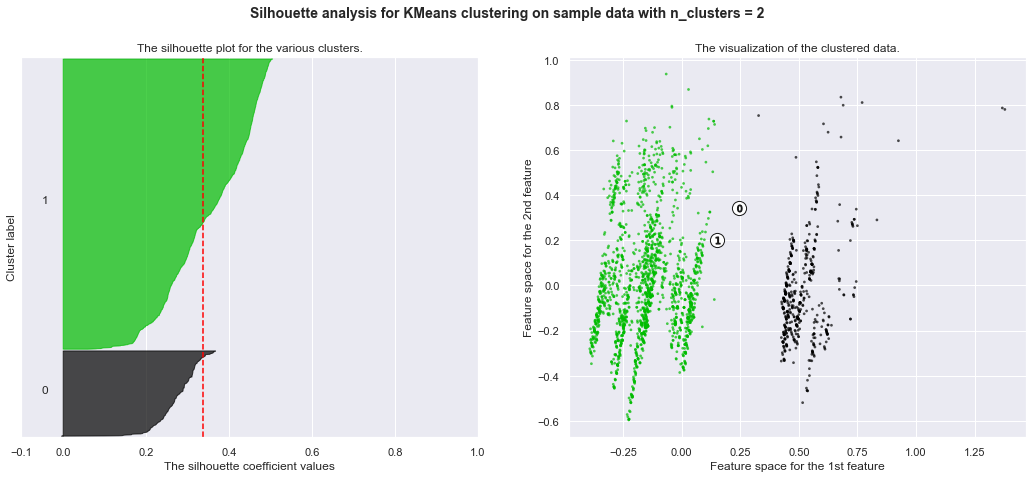

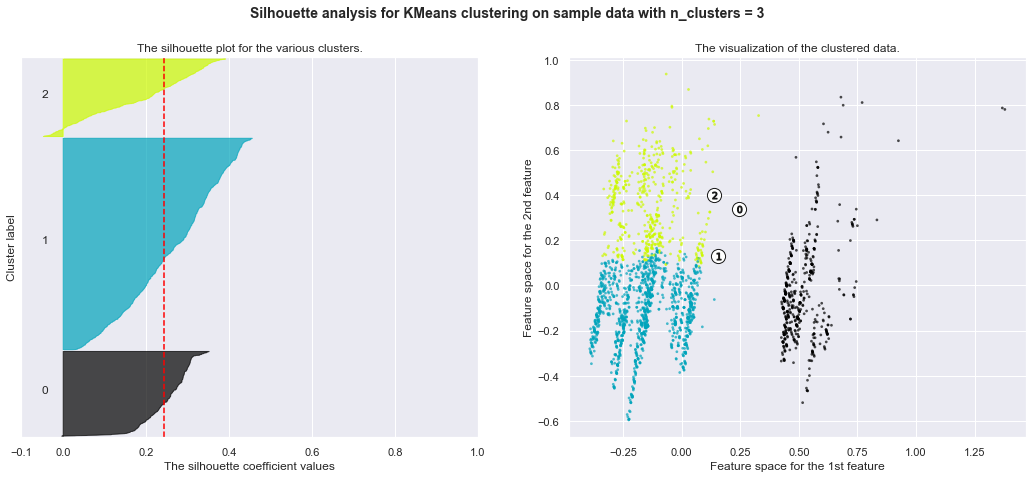

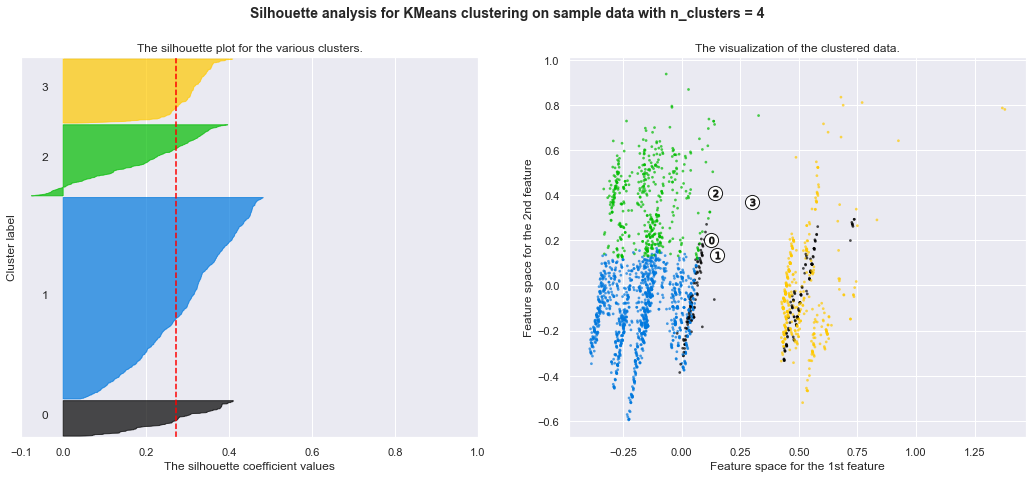

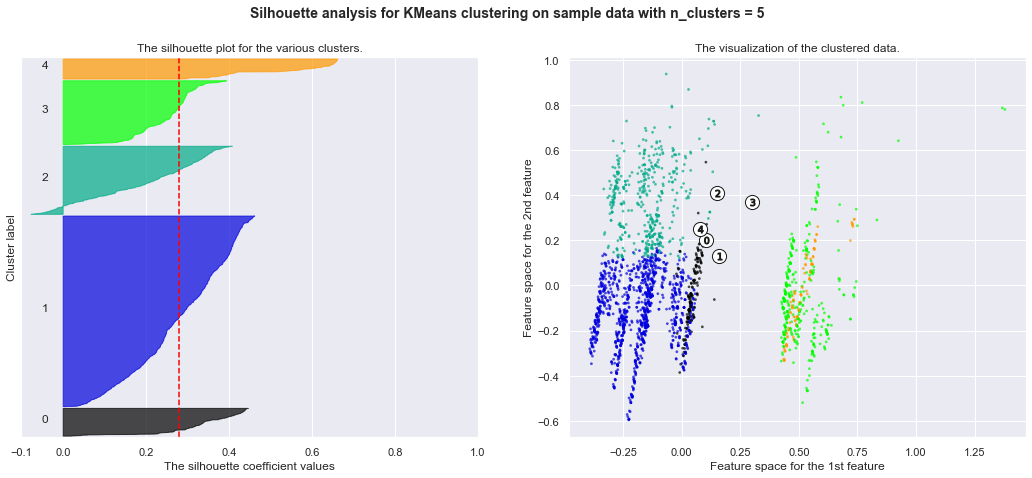

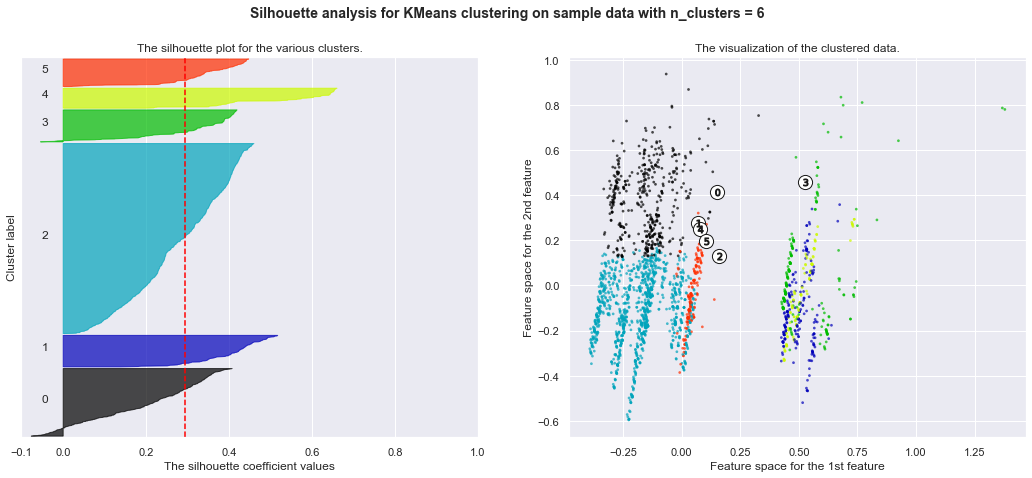

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

 vemos que con dos clusters  obtenemos el mejor coeficiente de silueta , ademas de forma visual como habiamos visto preveiamente coincide  perfectamente 

vamos a crear una columna  en nuestro dataset que nos indique a que cluster pertenece cada  observación

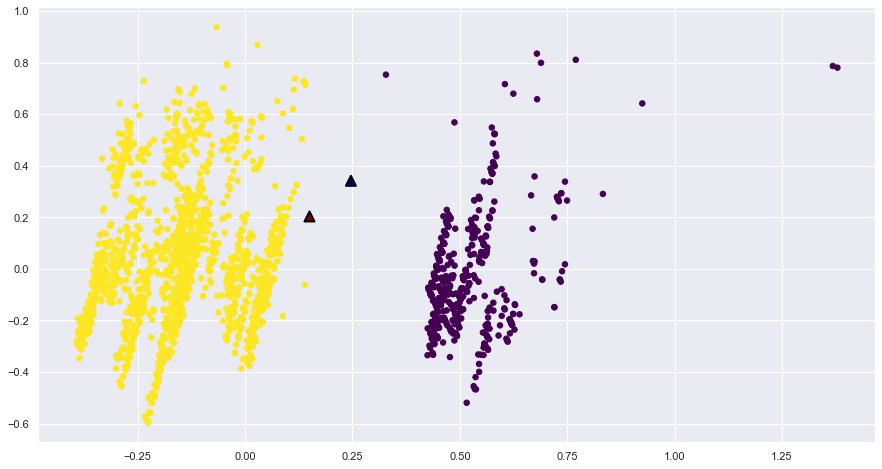

In [120]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")

In [121]:
df_norm['Kmeans_cluster']= labels

<AxesSubplot:>

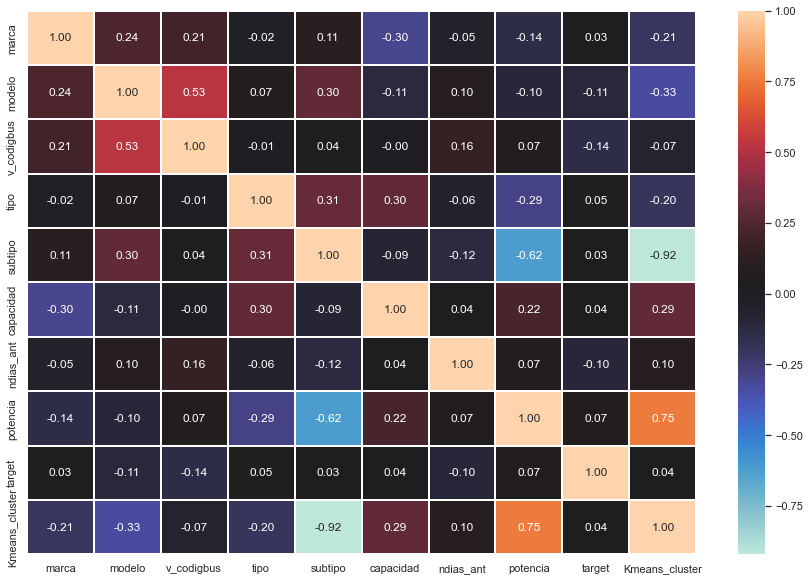

In [122]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

comprobamos que el claster esta duertemente realiconado como el subtipo, lo que confirma los resultados anteriores

In [123]:
df_norm.columns

Index(['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo',
       'capacidad', 'ndias_ant', 'potencia', 'target', 'Kmeans_cluster'],
      dtype='object')

### Seleccionamos las caracteristicas  que deseamos utilizar para cada cluster

In [145]:
#features=['target', 'modelo', 'v_codigbus', 'v_edad']
#features=['target', 'modelo', 'v_codigbus', 'v_edad', 'capacidad','marca','DBSCAN_cluster']
features=['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 
          'subtipo','capacidad', 'ndias_ant', 'potencia', 'target', 'Kmeans_cluster']
            
new_df=df_norm[features]
new_df[features] =  new_df[features].astype('int')


In [146]:
df_km0 =  new_df[ new_df['Kmeans_cluster'] == 0]
df_km1 =  new_df[ new_df['Kmeans_cluster'] == 1]
df_km0=df_km0.reset_index()
df_km1=df_km1.reset_index()

Despeus de ejecutar el  modelo se ha observado que las caracteristicas mas relevantes para cada claster son las siguientes

In [147]:
features0=['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo', 'target']  
df_km0=df_km0[features0]
features1=['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'potencia', 'subtipo', 'target']  
df_km1=df_km1[features1]

In [148]:
print(df_km0.shape)
print(df_km1.shape)

(534, 7)
(1816, 8)


Calculo para ponderar importancia de las bariables en función al tamaño del dataset

In [149]:
km0=df_km0.shape[0]
km1=df_km1.shape[0]

t=km0+km1
p0= round((km0/t),2)
p1= round((km1/t),2)

p0+p1


1.0

### Split Dataset

se divide los dataset en train y test para poder entrenar los medelos y luego testearlos

In [150]:

X_train0, X_test0, y_train0, y_test0 = train_test_split(
                                        df_km0.drop(columns = "target"),
                                        #new_df,
                                        df_km0['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

X_train1,X_test1, y_train1, y_test1 = train_test_split(
                                        df_km1.drop(columns = "target"),
                                        #new_df,
                                        df_km1['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

# Modelado
## RANDOM FOREST CLASSIFIER
se ha probado con diferentes modelos:   
DecisionTreeClassifier   
KNeighborsClassifier   
LogisticRegression   
AdaBoostClassifier   
GradientBoostingClassifier   
SVC   

utilizando al final random forest, porque es el modelo mas simple con mejor precisión

### RandomizedSearch

Se decide usar RandomizedSerch porque es mucho mas rapido y a pesar de no ser tan preciso como el gridSearch. 

In [151]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer,accuracy_score

Definimos el numero de iteraciones y los parametros entre los que va a buscar los mejores valores,

In [152]:
iteraciones=100

parameters_ran={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': np.arange(2,200,1),
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators':np.arange(20,100,1)
            }


#### Buscamos los mejores parametros para el Cluster 0

In [153]:
RF=RandomForestClassifier(random_state=0)
ran_rf0=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_rf0.fit(X_train0,y_train0)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41...
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
 

In [154]:
print("Best parameters from Randomsearch: {}".format(ran_rf0.best_params_))
print("CV score=%0.3f" % ran_rf0.best_score_)
cv_results = ran_rf0.cv_results_

Best parameters from Randomsearch: {'n_estimators': 24, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 67, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.738


#### Buscamos los mejores parametros para el Cluster 1

In [155]:
RF=RandomForestClassifier(random_state=0)
ran_rf1=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_rf1.fit(X_train1,y_train1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41...
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
 

In [156]:
print("Best parameters from Randomsearch: {}".format(ran_rf1.best_params_))
print("CV score=%0.3f" % ran_rf1.best_score_)
cv_results = ran_rf1.cv_results_

Best parameters from Randomsearch: {'n_estimators': 43, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': False}
CV score=0.639


### Constructor Cluster 0

FUGA DE AIRE
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 24, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 67, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

TRAIN Cluster 0 
CV score=0.7375


PREDICCIÓN Cluster0 


Accuracy prediction:  0.7238805970149254
f1-core :0.7239

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        72
           1       0.68      0.76      0.72        62

    accuracy                           0.72       134
   macro avg       0.73      0.73      0.72       134
weighted avg       0.73      0.72      0.72       134



Importancia Cluster 0:
        feature  importancia
0       marca     0.116865
1      modelo     0.140025
2  v_codigbus     0.166931
3        tipo     0.032668
4      v_edad     0.402967
5     subtipo     0.140546




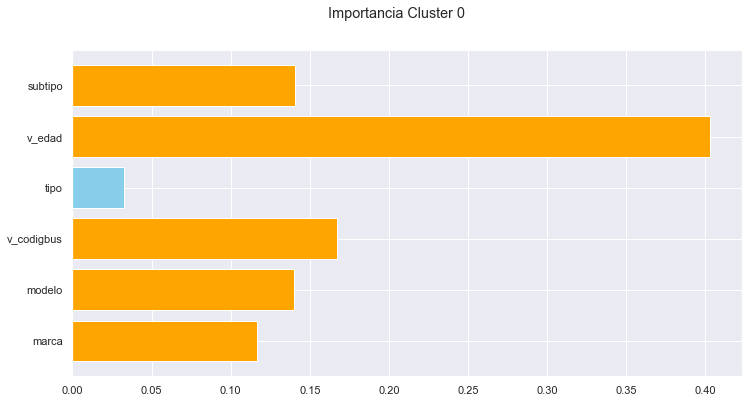

In [157]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_rf0.best_params_))

print('\nTRAIN Cluster 0 ')
print("CV score=%0.4f" % ran_rf0.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


rbp0=ran_rf0.best_params_
RF_ran0 = RandomForestClassifier(random_state=0,bootstrap= rbp0['bootstrap'],
                               class_weight=rbp0['class_weight'],
                               criterion=rbp0['criterion'],
                               max_depth=rbp0['max_depth'],
                               max_features=rbp0['max_features'],
                               min_samples_leaf=rbp0['min_samples_leaf'],
                               min_samples_split=rbp0['min_samples_split'],
                               n_estimators=rbp0['n_estimators'])

#Predicción
RF_ran0.fit(X_train0,y_train0)
y_pred0 = RF_ran0.predict(X_test0)
acc = accuracy_score(y_test0, y_pred0)
print ('PREDICCIÓN Cluster0 \n\n')
print ('Accuracy prediction: ', acc)
cr0=classification_report(y_test0, y_pred0, output_dict=True)
print('f1-core :%0.4f' %cr0['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test0, y_pred0))
print('\n')
importancia0=pd.DataFrame({ 'feature': X_test0.columns,'importancia': RF_ran0.feature_importances_})

print('Importancia Cluster 0:\n ',importancia0)
print('\n')
plt.suptitle('Importancia Cluster 0')
x=X_test0.columns
y=RF_ran0.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output0 = pd.DataFrame({ 'date': X_test0.index,'Real': y_test0, 'Predicho': y_pred0})

 podemos ver que ***'ndias_ant'*** , ***'capacidad'***  y ***'potencia'*** tienen una importancia de 0 para el cluster 0

### Constructor Custer 1

FUGA DE AIRE
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 43, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': False}

TRAIN Cluster 1 
CV score=0.6395


PREDICCIÓN Cluster 1 


Accuracy prediction:  0.5859030837004405
f1-core :0.5859

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.60      0.59      0.59       233
           1       0.57      0.58      0.58       221

    accuracy                           0.59       454
   macro avg       0.59      0.59      0.59       454
weighted avg       0.59      0.59      0.59       454



Importancia Cluster 1:
       features  importancia
0       marca     0.076465
1      modelo     0.176243
2  v_codigbus     0.292668
3        tipo     0.020528
4      v_edad     0.432034
5    potencia     0.001231
6     subtipo     0.000831




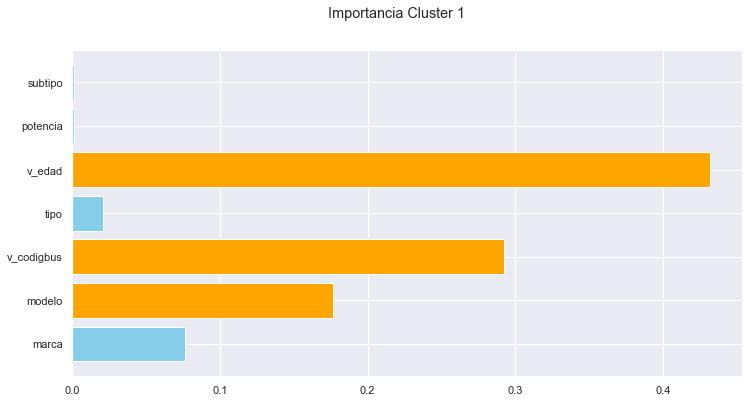

In [158]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_rf1.best_params_))

print('\nTRAIN Cluster 1 ')
print("CV score=%0.4f" % ran_rf1.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


rbp1=ran_rf1.best_params_
RF_ran1 = RandomForestClassifier(random_state=0,bootstrap= rbp1['bootstrap'],
                               class_weight=rbp1['class_weight'],
                               criterion=rbp1['criterion'],
                               max_depth=rbp1['max_depth'],
                               max_features=rbp1['max_features'],
                               min_samples_leaf=rbp1['min_samples_leaf'],
                               min_samples_split=rbp1['min_samples_split'],
                               n_estimators=rbp1['n_estimators'])

#Predicción
RF_ran1.fit(X_train1,y_train1)
y_pred1 = RF_ran1.predict(X_test1)
acc = accuracy_score(y_test1, y_pred1)
print ('PREDICCIÓN Cluster 1 \n\n')
print ('Accuracy prediction: ', acc)
cr1=classification_report(y_test1, y_pred1, output_dict=True)
print('f1-core :%0.4f' %cr1['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(y_test1, y_pred1))
print('\n')
importancia1=pd.DataFrame({ 'features': X_test1.columns,'importancia': RF_ran1.feature_importances_})

print('Importancia Cluster 1:\n ',importancia1)
print('\n')
plt.suptitle('Importancia Cluster 1')

x=X_test1.columns
y=RF_ran1.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
output1 = pd.DataFrame({ 'date': X_test1.index,'Real': y_test1, 'Predicho': y_pred1})

 podemos ver que ***'ndias_ant'*** y ***'capacidad'*** tienen una importancia de 0 para el cluster 1

creamos la variable de salida

In [159]:
output= pd.concat([output0, output1], ignore_index=True)
output

,date,Real,Predicho
0,501,0,1
1,155,1,1
2,306,0,1
3,11,1,1
4,54,1,1
...,...,...,...
583,564,1,0
584,1022,0,1
585,1014,0,0
586,1666,0,0


Creamos el dataset segun la importancia en el cual se multiplicará el valor de importancia por  el valor de ponderación, que esta determinado por el tamaño del cluster

In [160]:
importance0=RF_ran0.feature_importances_
importance1=RF_ran1.feature_importances_

important0= pd.DataFrame({ 'feature': X_test0.columns,'importancia': importance0,'vp':p0, 'imp_pond':importance0*p0,'cluster':0})
important1= pd.DataFrame({ 'feature': X_test1.columns,'importancia': importance1,'vp':p1,'imp_pond':importance1*p1,'cluster':1})

important = pd.concat([important0,important1], axis=0)
important

,feature,importancia,vp,imp_pond,cluster
0,marca,0.116865,0.23,0.026879,0
1,modelo,0.140025,0.23,0.032206,0
2,v_codigbus,0.166931,0.23,0.038394,0
3,tipo,0.032668,0.23,0.007514,0
4,v_edad,0.402967,0.23,0.092682,0
5,subtipo,0.140546,0.23,0.032326,0
0,marca,0.076465,0.77,0.058878,1
1,modelo,0.176243,0.77,0.135707,1
2,v_codigbus,0.292668,0.77,0.225355,1
3,tipo,0.020528,0.77,0.015807,1


Obtenemos la importancia de cada caracteristica para ambos cluster de forma combinada

In [161]:
imp=important.groupby('feature')['imp_pond'].sum()
imp

feature
marca         0.085757
modelo        0.167913
potencia      0.000948
subtipo       0.032966
tipo          0.023320
v_codigbus    0.263749
v_edad        0.425348
Name: imp_pond, dtype: float64

### Predicción combinada Cluster0 + Cluster1

PREDICCIÓN Combinada


Accuracy prediction:  0.6173469387755102
f1-core :0.6173

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.64      0.61      0.62       305
           1       0.60      0.62      0.61       283

    accuracy                           0.62       588
   macro avg       0.62      0.62      0.62       588
weighted avg       0.62      0.62      0.62       588



Importancia:
                features  importancia
feature                            
marca            marca     0.085757
modelo          modelo     0.167913
potencia      potencia     0.000948
subtipo        subtipo     0.032966
tipo              tipo     0.023320
v_codigbus  v_codigbus     0.263749
v_edad          v_edad     0.425348




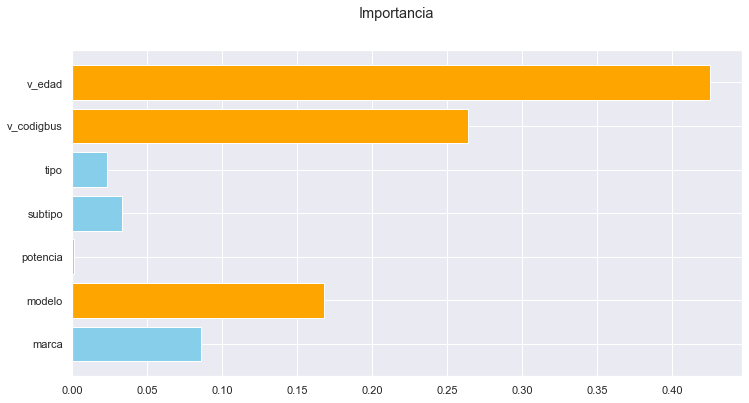

In [162]:
#Predicción combinada

acc = accuracy_score(output['Real'], output['Predicho'])
print ('PREDICCIÓN Combinada\n\n')
print ('Accuracy prediction: ', acc)
crc=classification_report(output['Real'],output['Predicho'], output_dict=True)
print('f1-core :%0.4f' %crc['accuracy']+'\n')


print('Random Forest Classifier \n')
print(classification_report(output['Real'],  output['Predicho']))
print('\n')


importancia=pd.DataFrame({ 'features': imp.index,'importancia': imp})

print('Importancia:\n ',importancia)
print('\n')
plt.suptitle('Importancia')
x=imp.index
y=imp
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)
plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png')

### Notificación proceso terminado

In [163]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+
              'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
              'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+           
              'RandomSearch Random Forest: '+'\n\n'+
              'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
              'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
              'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
              'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
              'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
              '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/351725840.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\Cluster0.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/351725840.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\Cluster1.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',


done


C:\Users\Dani\AppData\Local\Temp/ipykernel_3432/351725840.py:16: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Dani\\OneDrive - SOFTOUR SISTEMAS S.L\\Data_Science\\Prediccion talleres\\plots\\importancia.png'>
  requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
